# Predicting the flow 

## Decision tree regression on data from 2013-2018 one feature
Model based on one feature which is historical value of a given hour

### Importing necessary libraries

In [40]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import datetime as dt
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

### Loading the data set

In [3]:
flow = pd.read_csv('../dataset/flow2013.csv', parse_dates=['time'])
flow.head()

,time,flow
0,2013-09-09 10:50:00,2.805000
1,2013-09-09 10:55:00,2.796000
2,2013-09-09 11:00:00,2.791000
3,2013-09-09 11:05:00,46.680000
4,2013-09-09 11:10:00,48.029999


### Preparing the data 
Making the mean for each hour, reseting the index put on the time and leaving only integer representing the current hour

In [4]:
flow_h = pd.read_csv('../dataset/flow2013.csv', parse_dates={'hour':['time']},index_col='hour')
dayfirst=True
flow_h = flow_h.resample('60T').mean()

In [5]:
flow_h = flow_h.reset_index()

In [6]:
flow_h['time'] = flow_h['hour']
flow_h.head()

,hour,flow,time
0,2013-09-09 10:00:00,2.800500,2013-09-09 10:00:00
1,2013-09-09 11:00:00,38.436750,2013-09-09 11:00:00
2,2013-09-09 12:00:00,39.892500,2013-09-09 12:00:00
3,2013-09-09 13:00:00,20.223334,2013-09-09 13:00:00
4,2013-09-09 14:00:00,18.574167,2013-09-09 14:00:00


### Taking only the hour of the flow from the datetime column

In [7]:
flow_h['hour'] = (flow_h['hour'].dt.hour)

In [8]:
flow_h.head()

,hour,flow,time
0,10,2.800500,2013-09-09 10:00:00
1,11,38.436750,2013-09-09 11:00:00
2,12,39.892500,2013-09-09 12:00:00
3,13,20.223334,2013-09-09 13:00:00
4,14,18.574167,2013-09-09 14:00:00


### Splitting the data set into train and test sets

In [9]:
split_date = pd.datetime(2017,12,31,23,59)

flow_training = flow_h.loc[flow_h['time'] <= split_date]
flow_test = flow_h.loc[flow_h['time'] > split_date]

flow_training = flow_training.dropna()
flow_test = flow_test.dropna()

In [10]:
flow_training.head()

,hour,flow,time
0,10,2.800500,2013-09-09 10:00:00
1,11,38.436750,2013-09-09 11:00:00
2,12,39.892500,2013-09-09 12:00:00
3,13,20.223334,2013-09-09 13:00:00
4,14,18.574167,2013-09-09 14:00:00


In [11]:
flow_test.head()

,hour,flow,time
37790,0,65.062181,2018-01-01 00:00:00
37791,1,62.089403,2018-01-01 01:00:00
37792,2,59.599414,2018-01-01 02:00:00
37793,3,52.519042,2018-01-01 03:00:00
37794,4,44.307970,2018-01-01 04:00:00


In [12]:
X_flow_training = flow_training['hour']
Y_flow_training = flow_training['flow']

X_flow_test = flow_test['hour']
Y_flow_test = flow_test['flow']

### Reshaping the data to 2D array

In [13]:
X_flow_training = X_flow_training.values.reshape(-1,1)
Y_flow_training = Y_flow_training.values.reshape(-1,1)
X_flow_test = X_flow_test.values.reshape(-1,1)
Y_flow_test = Y_flow_test.values.reshape(-1,1)

### Creating a regression tree model
The model learns on one feature

In [14]:
regressor = DecisionTreeRegressor()
regressor.fit(X_flow_training, Y_flow_training)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### Predicting the value on unknown test data

In [15]:
predict = regressor.predict(X_flow_test)

### Plot for the tree regression model

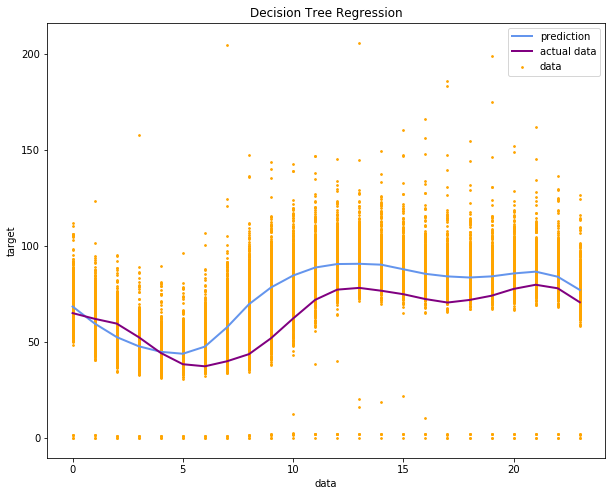

In [16]:
plt.figure(figsize=(10, 8))
plt.scatter(X_flow_training, Y_flow_training, s=3,
            c="orange", label="data")
plt.plot(X_flow_test[0:24], predict[:24], color="cornflowerblue",
         label="prediction", linewidth=2)
plt.plot(X_flow_test[0:24], Y_flow_test[:24], color="purple",
         label="actual data", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### Implementing metrics (mean absolute percentage error)

In [17]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### MAPE for tree regression (one feature)

In [18]:
mape_one = mean_absolute_percentage_error(Y_flow_test, predict)
mape_one

29.424808431473252

## Decision tree regression on data from 2013-2018 two features
Model based on two features which are historical value of a given hour and previous hour

In [19]:
flow_m2 = pd.read_csv('../dataset/flow2013.csv', parse_dates={'hour':['time']},index_col='hour')
dayfirst=True
flow_m2 = flow_m2.resample('60T').mean()

In [20]:
flow_m2 = flow_m2.reset_index()

In [21]:
flow_m2['time'] = flow_m2['hour']
flow_m2.head()

,hour,flow,time
0,2013-09-09 10:00:00,2.800500,2013-09-09 10:00:00
1,2013-09-09 11:00:00,38.436750,2013-09-09 11:00:00
2,2013-09-09 12:00:00,39.892500,2013-09-09 12:00:00
3,2013-09-09 13:00:00,20.223334,2013-09-09 13:00:00
4,2013-09-09 14:00:00,18.574167,2013-09-09 14:00:00


In [22]:
flow_m2['hour'] = (flow_m2['hour'].dt.hour)

In [23]:
flow_m2.head()

,hour,flow,time
0,10,2.800500,2013-09-09 10:00:00
1,11,38.436750,2013-09-09 11:00:00
2,12,39.892500,2013-09-09 12:00:00
3,13,20.223334,2013-09-09 13:00:00
4,14,18.574167,2013-09-09 14:00:00


### Adding the column with the value of previous hour

In [24]:
flow_m2['previous-hour'] = flow_m2['flow'].shift(1)

In [25]:
flow_m2.head()

,hour,flow,time,previous-hour
0,10,2.800500,2013-09-09 10:00:00,NaN
1,11,38.436750,2013-09-09 11:00:00,2.800500
2,12,39.892500,2013-09-09 12:00:00,38.436750
3,13,20.223334,2013-09-09 13:00:00,39.892500
4,14,18.574167,2013-09-09 14:00:00,20.223334


### Splitting the data set into train and test sets

In [26]:
split_date = pd.datetime(2017,12,31,23,59)

flow_training2 = flow_m2.loc[flow_m2['time'] <= split_date]
flow_test2 = flow_m2.loc[flow_m2['time'] > split_date]

flow_training2 = flow_training2.dropna()
flow_test2 = flow_test2.dropna()

In [27]:
flow_training2.head()

,hour,flow,time,previous-hour
1,11,38.436750,2013-09-09 11:00:00,2.800500
2,12,39.892500,2013-09-09 12:00:00,38.436750
3,13,20.223334,2013-09-09 13:00:00,39.892500
4,14,18.574167,2013-09-09 14:00:00,20.223334
5,15,21.835833,2013-09-09 15:00:00,18.574167


In [28]:
flow_test2.head()

,hour,flow,time,previous-hour
37790,0,65.062181,2018-01-01 00:00:00,75.074355
37791,1,62.089403,2018-01-01 01:00:00,65.062181
37792,2,59.599414,2018-01-01 02:00:00,62.089403
37793,3,52.519042,2018-01-01 03:00:00,59.599414
37794,4,44.307970,2018-01-01 04:00:00,52.519042


In [29]:
X_flow_training2 = flow_training2[['hour','previous-hour']]

In [30]:
X_flow_test2 = flow_test2[['hour','previous-hour']]

In [31]:
Y_flow_training2 = flow_training2['flow'].values.reshape(-1,1)

In [32]:
Y_flow_test2 = flow_test2['flow'].values.reshape(-1,1)

In [33]:
regressor2 = DecisionTreeRegressor()
regressor2.fit(X_flow_training2, Y_flow_training2)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### Creating a multiple regression model with decision tree

In [34]:
predict2 = regressor2.predict(X_flow_test2)

### Plot for the model showing only hour feature

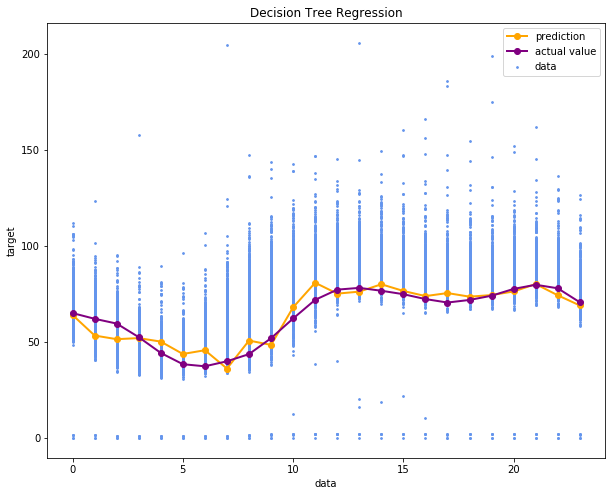

In [35]:
plt.figure(figsize=(10, 8))
plt.scatter(X_flow_training2['hour'], Y_flow_training2, s=3, 
            c="cornflowerblue", label="data")
plt.plot(X_flow_test2['hour'][:24], predict2[:24], color="orange",
         marker="o",label="prediction", linewidth=2)
plt.plot(X_flow_test2['hour'][:24],Y_flow_test2[:24], c='purple',marker="o", label="actual value",linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### MAPE for tree regression (two features)

In [36]:
mape_two = mean_absolute_percentage_error(Y_flow_test2, predict2)
mape_two

30.098283633250432

# Comparison with neural network

### Creating a model
MLPRegressor() from sklearn.neural_network


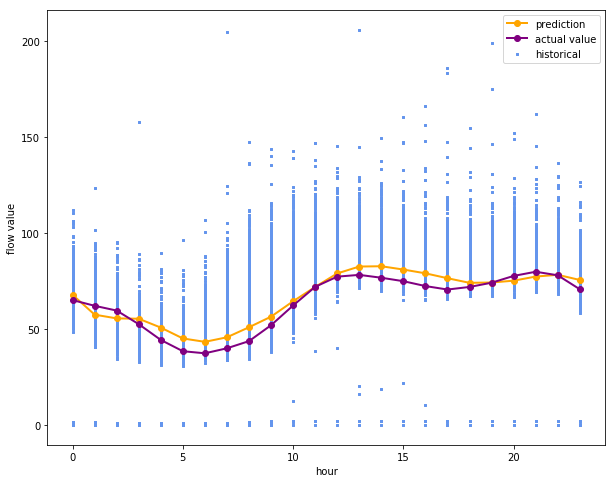

In [41]:
X = X_flow_training2[['hour','previous-hour']]
y = Y_flow_training2
test_x = X_flow_test2[['hour','previous-hour']]
test_y = Y_flow_test2
    
nn = MLPRegressor()
n = nn.fit(X, y.ravel())
predict_y = nn.predict(test_x)
    
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(111)

plt.xlabel("hour")
plt.ylabel("flow value")

ax1.scatter(X['hour'], y, s=3, color="cornflowerblue", marker="s", label='historical')
plt.plot(test_x['hour'][:24],predict_y[:24], color='orange', marker="o", label="prediction",linewidth=2)
plt.plot(test_x['hour'][:24],test_y[:24], c='purple', marker="o", label="actual value",linewidth=2)
plt.legend()
plt.show()

### MAPE for neural network

In [42]:
mape_neural = mean_absolute_percentage_error(test_y, predict_y)
mape_neural

30.284636169948225